# Задача #2
#Математические модели обработки сигналов
#Александр Янн
#23.М20-ПУ

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

with open('/Users/sasha/Desktop/CryptedFreq.npy', 'rb') as f:
    signal = np.load(f)

t = np.linspace(0,signal[-1],1792,endpoint=True)
fs = 512
len(signal)

1792

In [36]:
def myDFT_AmplPlot(t, x, N=512, fs = False, xLim = 0.5):

    if len(x)>512:
        N = len(x)

    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)

    xList = [x, xA]
    titles = ['Сигнал', 'Спектр']

    # Графики
    plt.figure(figsize=(10, 5))
    for i, sig in enumerate(xList):
        plt.subplot(2, 2, i+1)
        plt.title(titles[i])
        if i == 0:
            plt.plot(t, sig)
            plt.xlabel('Временные отсчёты')
            #plt.xlim([-0.25, len(x)-0.75])
        else:
            if fs == False:
                plt.plot(np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частотные отсчёты')
                plt.xlim([0, xLim])
                plt.xticks(np.linspace(0, xLim, 11))
            else:
                plt.plot(fs*np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частоты')
                plt.xlim([0, fs*xLim])
                plt.xticks(np.linspace(0, fs*xLim, 11))
        plt.grid()
    plt.tight_layout()

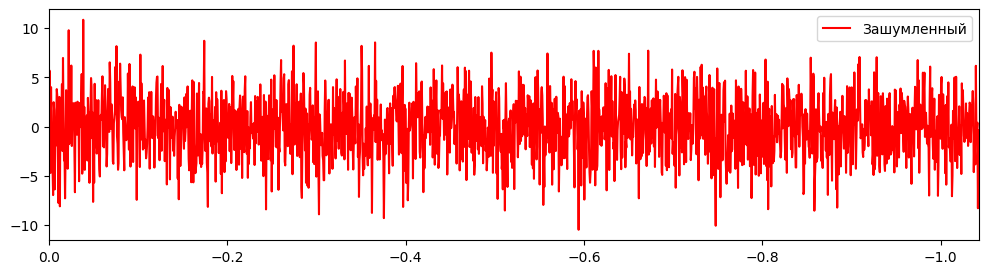

In [37]:
plt.figure(figsize=(12, 3))
plt.plot(t, signal, color='r', label = 'Зашумленный')
plt.xlim(t[0],t[-1])
plt.legend()

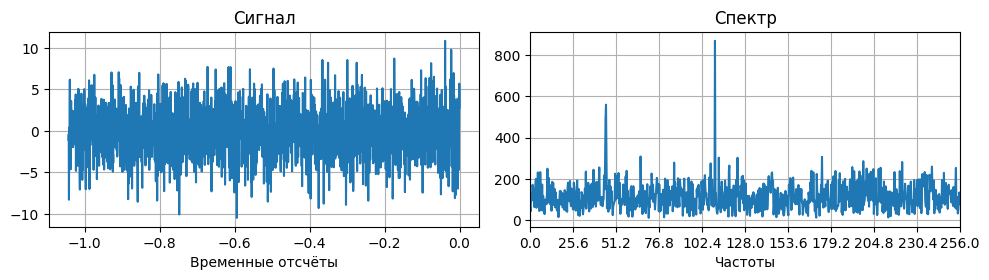

In [38]:
from scipy.fftpack import fft, ifft, fftshift

myDFT_AmplPlot(t,signal, fs = fs)

In [39]:
n=len(t)
sigF = fft(signal,n)
sigFA = np.abs(sigF)
ind = sigFA > 300
sigF_clean = sigF * ind
sig_clean = np.real(ifft(sigF_clean))



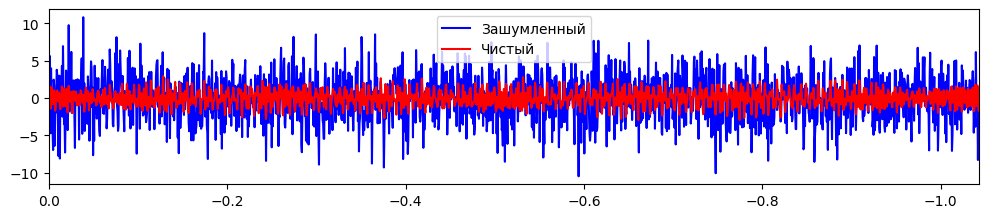

In [40]:
plt.figure(figsize=(12, 5))
plt.subplot(2,1,2)
plt.plot(t, signal, color='b', label = 'Зашумленный')
plt.plot(t, sig_clean, color='r', label = 'Чистый')
plt.xlim(t[0],t[-1])
plt.legend()

In [41]:
sig_clean

array([-0.20808147,  1.61427379,  0.76389093, ...,  0.47001209,
       -1.59977704, -1.74297382])